In [ ]:
def regenerate_interval(csv, interval,  daytype, path,  start='04:20', end='16:30'):
    '''Regenerate interval to get rid of missing rows, NaN, Inf,etc- to get uniform df's  '''
    df = pd.read_csv(csv, parse_dates=True, index_col= 0)
    name = str(csv[-22:]).replace('.csv', '')
    typ = daytype.split(' ')
    yy = [5 if v is 'Up' else -5 if v is 'Down' else 0 if v is 'Range' else -2 if v is 'RangeDown' 
          else 2 if v is 'RangeUp' else 'unknown' for v in typ]
  
    df_resampled = df.resample(interval).pad().replace(0, df.value.shift(3).max())  #.fillna(0)
    # # Add any missing intervals until the end of the day
    minuT = int(interval[0]) * 60
    end_of_day = pd.date_range(df.index[-1], periods=(pd.Timestamp(df.index[-1]).replace(hour=23, minute=59, second=59) - pd.Timestamp(df.index[-1])).seconds//minuT + 1, freq=interval)[1:]
    df_resampled = df_resampled.reindex(df_resampled.index.union(end_of_day))
    df_resampled = df_resampled.fillna(0)
    df_resampled = df_resampled.between_time(start, end)
   
    folder_path =  path
    df_resampled['day'] = str(daytype)
    df_resampled['type'] = yy[0]
#     print('yy type is: ' , type(yy[0]),'\n-----\n', yy[0])
   
    file_path = os.path.join(folder_path, name + str('_' + daytype) + '.pickle')
    # print('file_path is ',file_path)
    df_resampled.to_pickle(file_path)
    print('Name is: ', name)
    print('Shape is: ', df_resampled.shape)
    # df = pd.read_pickle(name +'.pickle')
    return df_resampled

In [61]:

# def min_max_scale(series):
#     min_value = series.min()
#     max_value = series.max()
#     return (series - min_value) / (max_value - min_value)

def min_max_scale2(series):
    min_value = series.min()
    daily_min = df.groupby(df.index.date)['Close'].min()
    daily_max = df.groupby(df.index.date)['Close'].max()
    
    max_value = series.max()
    return (series - min_value) / (max_value - min_value)


# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Group by day and find min and max close values
daily_min = df.groupby(df.index.date)['Close'].min()
daily_max = df.groupby(df.index.date)['Close'].max()

# Combine the min and max close values into a single DataFrame
daily_min_max = pd.concat([daily_min, daily_max], axis=1)
daily_min_max.columns = ['Min_Close', 'Max_Close']

# Display the resulting DataFrame
print(daily_min_max)


In [1]:
import pandas as pd
import numpy as np
import os
import json
import pandas_datareader.data as web   # my local kernel Python 3.10.7 
import matplotlib.pyplot as plt  # unavailable?  do: 1. pip uninstall matplotlib # 2. python3 -m pip install matplotlib
%matplotlib inline
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import datetime
import io
pd.set_option('display.max_columns', None)
# import warnings
import seaborn as sns
import scipy
from scipy import stats
# warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import talib as ta
import scipy
from scipy import stats
import mplfinance as mpf
# from library.sb_utils import save_file
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pd.set_option('display.max_rows', 100)  # Display up to 100 rows
pd.set_option('display.max_columns', 50)  # Display up to 50 columns
pd.set_option('display.max_colwidth',100)  # Display up to 100 characters per column value

# !pip install plotly
import plotly

In [ ]:
aansarov@gmail.com 
BigbirdB888!

In [ ]:
# url = "https://raw.githubusercontent.com/lamass/Capstone_3/main/Reducted/mergedDownReducted.csv"
# down = pd.read_csv(url, index_col=0, parse_dates=True) 
down.head()
# down.shape    # (31768, 12)

In [10]:
# select hours between 5am and 4pm
# downPeriod= down.between_time('03:00', '16:30')
downPeriod.shape  # (19271, 12)  
# nqD = downPeriod[downPeriod['close'] > 7000]
# nqD.shape    #   (8932, 12)
# esD = downPeriod[downPeriod['close'] < 7000]
# esD.shape    #  (10339, 12)

# nqD['scaled'] = stats.zscore(nqD.loc[:,'close']) 
nqD.head()
# esD['scaled'] = stats.zscore(esD.loc[:,'close']) 
# esD.head()

,volume,BidAsk,open,high,low,close,day,type,rsi,adx,pct_change,volatility,scaled
DateTime,,,,,,,,,,,,,
2022-12-27 03:00:00,390,-12,11159.75,11164.5,11157.75,11158.75,D,-0.5,65.530802,28.921665,0.000000,15.710725,-0.788733
2022-12-27 03:02:00,183,32,11159.25,11164.0,11156.50,11163.25,D,-0.5,71.855985,29.204614,0.000403,15.710757,-0.781022
2022-12-27 03:04:00,293,-4,11163.75,11167.0,11161.50,11165.25,D,-0.5,74.155401,30.190285,0.000179,15.710739,-0.777595
2022-12-27 03:06:00,325,48,11166.00,11172.0,11164.75,11170.00,D,-0.5,78.670477,32.026053,0.000425,15.710718,-0.769456
2022-12-27 03:08:00,129,-63,11170.00,11172.0,11168.00,11169.25,D,-0.5,76.372280,33.708839,-0.000067,15.710714,-0.770741


To calculate the variance of the price of OHLC (Open, High, Low, Close) candles for the last 5 minutes, you can follow these steps:

Filter the data to keep only the records for the last 5 minutes.
Calculate the average price for each candle (e.g., by averaging the Open, High, Low, and Close prices).
Compute the variance of the average prices.
This code assumes that you have a data frame named 'data' with columns 'timestamp' (datetime type), 'Open', 'High', 'Low', and 'Close'. Modify the code as needed to match your data frame structure.

In [ ]:

from datetime import datetime, timedelta

# Assuming your data frame is named 'data' and has columns 'timestamp', 'Open', 'High', 'Low', 'Close'

# Get the current timestamp (replace this with the desired end time if not 'now')
now = datetime.now()

# Calculate the timestamp 5 minutes before 'now'
five_minutes_ago = now - timedelta(minutes=5)

# Filter the data to keep only records for the last 5 minutes
filtered_data = data[(data['timestamp'] >= five_minutes_ago) & (data['timestamp'] <= now)]

# Calculate the average price for each candle
filtered_data['AveragePrice'] = (filtered_data['Open'] + filtered_data['High'] + filtered_data['Low'] + filtered_data['Close']) / 4

# Compute the variance of the average prices
price_variance = np.var(filtered_data['AveragePrice'])

print(f"Price variance for the last 5 minutes: {price_variance}")


To distinguish the type of "Day" based on the first 30 to 60 minutes of the trading day, you can follow these steps:

Preprocess the data.
Extract relevant features from the first 30 to 60 minutes.
Split the data into training and testing sets.
Train various machine learning models.
Evaluate and compare the performance of the models.
Here's a high-level outline of how you can approach this problem:

Preprocess the data:

Combine the 5 data frames into one large data frame.
Ensure the datetime index is properly set and sorted.
Filter the data to keep only records between 9:30 and 10:30.
Extract relevant features:

You may want to create new features based on the first 30 to 60 minutes, such as:
Average volume
Price change (Close - Open)
Price range (High - Low)
Bid-Ask spread
You can also use existing features such as Open, High, Low, Close, Volume, and BidAsk.
Split the data into training and testing sets:

Use a method like train_test_split from scikit-learn to divide your data into a training set and a testing set.
Train various machine learning models:

Experiment with different models, such as Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, or Neural Networks.
Use cross-validation to fine-tune the hyperparameters of each model.
Evaluate and compare the performance of the models:

Measure the accuracy, precision, recall, or F1 score of each model on the testing set.
Choose the model that best fits your desired level of confidence and performance.
Keep in mind that feature engineering and model selection are often iterative processes. You may need to experiment with different features and models to find the best approach for your problem.

Here's a code outline using Python and scikit-learn to guide you through the process:

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

# Combine the data frames into one large data frame
combined_df = pd.concat([df1, df2, df3, df4, df5])

# Filter the data to keep only records between 9:30 and 10:30
filtered_df = combined_df.between_time('9:30', '10:30')

# Feature engineering: create relevant features based on the first 30 to 60 minutes
# (e.g., average volume, price change, price range, bid-ask spread)

# Prepare the feature matrix X and the target variable y
X = filtered_df.drop('Day', axis=1)  # Modify this line to include only relevant features
y = filtered_df['Day']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the target variable
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train various machine learning models and fine-tune hyperparameters using cross-validation

# Evaluate and compare the performance of the models on the testing set
# (e.g., accuracy, precision, recall, F1 score)


Modify the code as needed to match your data frame structure, feature selection, and model choice. This outline should give you a starting point for building, training, and evaluating different models

 Let's use two different models as examples: Logistic Regression and Random Forest. I'll show you how to train and test both models using the preprocessed data from the previous code outline.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# [Combine the data frames, filter, and preprocess as shown in the previous example]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Test the Logistic Regression model
y_pred_log_reg = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg, average='weighted')

print(f"Logistic Regression Test accuracy: {accuracy_log_reg}")
print(f"Logistic Regression Test F1 score: {f1_log_reg}")
print(f"Logistic Regression Classification report:\n{classification_report(y_test, y_pred_log_reg)}")

# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Test the Random Forest model
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest, average='weighted')

print(f"Random Forest Test accuracy: {accuracy_random_forest}")
print(f"Random Forest Test F1 score: {f1_random_forest}")
print(f"Random Forest Classification report:\n{classification_report(y_test, y_pred_random_forest)}")


This code trains and tests both Logistic Regression and Random Forest models using the preprocessed data. It prints the accuracy and F1 scores, as well as the classification report for each model. You can compare the results to decide which model performs better for your task.

Remember to replace the placeholder preprocessing code with the actual preprocessing steps from the previous example, and adjust the code as needed to match your data frame structure and feature selection.

To train and test an Artificial Neural Network (ANN) using gradient descent, we can use the Keras library, which is part of TensorFlow. Here's an example of how to create, train, and test an ANN using Keras:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score, f1_score, classification_report

# [Combine the data frames, filter, and preprocess as shown in the previous example]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode the target variable to one-hot vectors
onehot_encoder = OneHotEncoder(sparse=False)
y_train_onehot = onehot_encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = onehot_encoder.transform(y_test.reshape(-1, 1))

# Define the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train_onehot.shape[1], activation='softmax'))

# Compile the model using gradient descent as the optimizer
model.compile(optimizer=SGD(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_onehot, epochs=50, batch_size=32, verbose=1)

# Test the model
y_pred_onehot = model.predict(X_test)
y_pred = np.argmax(y_pred_onehot, axis=1)

# Calculate the accuracy and F1 score
accuracy_ann = accuracy_score(y_test, y_pred)
f1_ann = f1_score(y_test, y_pred, average='weighted')

print(f"ANN Test accuracy: {accuracy_ann}")
print(f"ANN Test F1 score: {f1_ann}")
print(f"ANN Classification report:\n{classification_report(y_test, y_pred)}")


This example creates a simple ANN with two hidden layers containing 64 and 32 neurons, respectively. The output layer uses the softmax activation function, which is suitable for multi-class classification problems. The Stochastic Gradient Descent (SGD) optimizer is used for training.

Remember to replace the placeholder preprocessing code with the actual preprocessing steps from the previous example, and adjust the code as needed to match your data frame structure and feature selection.

You can further fine-tune the ANN architecture, optimizer settings, and training parameters (such as learning rate, batch size, and number of epochs) to improve its performance. You might also consider using other optimizers like Adam, RMSprop, or Adagrad that can potentially provide better results than plain gradient descent.

Ocan visualize the difference between the first trading hour (9:30 to 10:30) and the rest of the day by plotting the means of 30-minute intervals for 40 days. You can use a library like Matplotlib or Seaborn to create these plots. Here's an example of how you can create such a plot using Matplotlib:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# [Combine the data frames, filter, and preprocess as shown in the previous example]

# Resample the data frame to 30-minute intervals and calculate the mean for each interval
resampled_df = combined_df.resample('30T').mean()

# Filter the data to keep only the first trading hour and the rest of the day
first_hour = resampled_df.between_time('9:30', '10:30')
rest_of_day = resampled_df.between_time('10:31', '16:00')

# Group the data by 'Type of Day' and calculate the mean for each group
first_hour_grouped = first_hour.groupby('Day').mean()
rest_of_day_grouped = rest_of_day.groupby('Day').mean()

# Plot the means for the first trading hour
first_hour_grouped.T.plot(figsize=(12, 6), title="First Trading Hour (9:30 to 10:30)")
plt.legend(title="Type of Day")
plt.xticks(np.arange(len(first_hour_grouped.columns)), first_hour_grouped.columns)
plt.xlabel("Time")
plt.ylabel("Mean Value")

# Plot the means for the rest of the day
rest_of_day_grouped.T.plot(figsize=(12, 6), title="Rest of the Day (10:31 to 16:00)")
plt.legend(title="Type of Day")
plt.xticks(np.arange(len(rest_of_day_grouped.columns)), rest_of_day_grouped.columns)
plt.xlabel("Time")
plt.ylabel("Mean Value")

plt.show()


This code resamples the combined data frame to 30-minute intervals and calculates the mean for each interval. It then filters the data to keep only the first trading hour (9:30 to 10:30) and the rest of the day (10:31 to 16:00), and groups the data by the "Type of Day" column. Finally, it plots the means for each group.

Remember to replace the placeholder preprocessing code with the actual preprocessing steps from the previous examples, and adjust the code as needed to match your data frame structure and feature selection.

Yes, there are several 3D visualization libraries in Python that can help you create more advanced plots. One such library is Plotly, which provides interactive 3D plots that can be helpful in visualizing your data.

Here's an example of how you can create a 3D bar chart using Plotly to visualize the mean values of 30-minute intervals for the first trading hour and the rest of the day:

In [ ]:

# import plotly.express as px

# [Combine the data frames, filter, and preprocess as shown in the previous example]

# Resample the data frame to 30-minute intervals and calculate the mean for each interval
resampled_df = combined_df.resample('30T').mean()

# Filter the data to keep only the first trading hour and the rest of the day
first_hour = resampled_df.between_time('9:30', '10:30')
rest_of_day = resampled_df.between_time('10:31', '16:00')

# Group the data by 'Type of Day' and calculate the mean for each group
first_hour_grouped = first_hour.groupby('Day').mean()
rest_of_day_grouped = rest_of_day.groupby('Day').mean()

# Transform the data frames into a long format
first_hour_long = first_hour_grouped.reset_index().melt(id_vars='Day', var_name='Time', value_name='Mean Value')
rest_of_day_long = rest_of_day_grouped.reset_index().melt(id_vars='Day', var_name='Time', value_name='Mean Value')

# Create the 3D bar charts
fig_first_hour = px.bar_3d(first_hour_long, x='Day', y='Time', z='Mean Value', color='Day', opacity=0.8)
fig_rest_of_day = px.bar_3d(rest_of_day_long, x='Day', y='Time', z='Mean Value', color='Day', opacity=0.8)

# Update the chart titles
fig_first_hour.update_layout(title_text="First Trading Hour (9:30 to 10:30)", title_x=0.5)
fig_rest_of_day.update_layout(title_text="Rest of the Day (10:31 to 16:00)", title_x=0.5)

# Show the charts
fig_first_hour.show()
fig_rest_of_day.show()


This code uses the Plotly Express library to create two 3D bar charts, one for the first trading hour and the other for the rest of the day. The charts are interactive, allowing you to zoom, pan, and rotate the view to better explore the data.

Remember to replace the placeholder preprocessing code with the actual preprocessing steps from the previous examples, and adjust the code as needed to match your data frame structure and feature selection.

## Normalize

In [219]:
# close_seriesCopy = close_series.copy()  
close_seriesCopy.head()

,Vol,BidAsk,open,high,low,close,day,type,closeSc
DateTime,,,,,,,,,
2022-12-29 04:20:00,287.0,-9.0,10837.25,10841.50,10837.00,10838.25,Up,5,0.781880
2022-12-29 04:22:00,248.0,40.0,10838.25,10844.00,10838.25,10842.50,Up,5,0.782958
2022-12-29 04:24:00,312.0,3.0,10842.50,10845.00,10841.00,10843.50,Up,5,0.783211
2022-12-29 04:26:00,269.0,-63.0,10844.00,10844.75,10837.00,10837.75,Up,5,0.781754
2022-12-29 04:28:00,211.0,-64.0,10837.00,10838.00,10834.50,10835.50,Up,5,0.781183


In [224]:
type(daily_group)
daily_group.ngroups

27

In [225]:
import pandas as pd

# Sample data
data = {'A': ['foo', 'bar', 'baz', 'foo', 'bar', 'baz'],
        'B': [1, 2, 3, 4, 5, 6]}
df = pd.DataFrame(data)

# Group the DataFrame by column 'A'
grouped_df = df.groupby('A')

# Get the number of groups using the ngroups attribute
num_groups = grouped_df.ngroups
print("Number of groups using ngroups attribute:", num_groups)

# Get the number of groups using the len() function on the groups attribute
num_groups = len(grouped_df.groups)
print("Number of groups using len() function on groups attribute:", num_groups)


Number of groups using ngroups attribute: 3
Number of groups using len() function on groups attribute: 3


In [227]:
grouped_df.groups

{'bar': [1, 4], 'baz': [2, 5], 'foo': [0, 3]}

In [ ]:

# Assuming your Series is named 'close_series'
# Make sure the index is a datetime object
# close_series.index = pd.to_datetime(close_series.index)

# Group by day
daily_group = close_series.groupby(close_series.index.date)

# Define the mean normalization scaling function
def mean_normalization(group):
    mean_value = group.mean()
    min_value = group.min()
    max_value = group.max()
    return (group - mean_value) / (max_value - min_value)

# Apply the mean normalization scaling function to each day's 'Close' values
centered_close_series = daily_group.transform(mean_normalization)

# Display the resulting centered Series
print(centered_close_series)


In [264]:
centered_close_series.head()

,Vol,BidAsk,open,high,low,close,type,closeSc
DateTime,,,,,,,,
2022-09-28 04:20:00,-0.036734,0.051955,-0.356201,-0.333017,-0.346673,-0.316092,NaN,-0.316092
2022-09-28 04:22:00,-0.078964,-0.029142,-0.315187,-0.328664,-0.322943,-0.329023,NaN,-0.329023
2022-09-28 04:24:00,-0.090596,0.012599,-0.325440,-0.319415,-0.316872,-0.305316,NaN,-0.305316
2022-09-28 04:26:00,-0.079975,-0.048522,-0.303854,-0.323223,-0.348881,-0.355424,NaN,-0.355424
2022-09-28 04:28:00,-0.073085,-0.034807,-0.351344,-0.371102,-0.368748,-0.368355,NaN,-0.368355


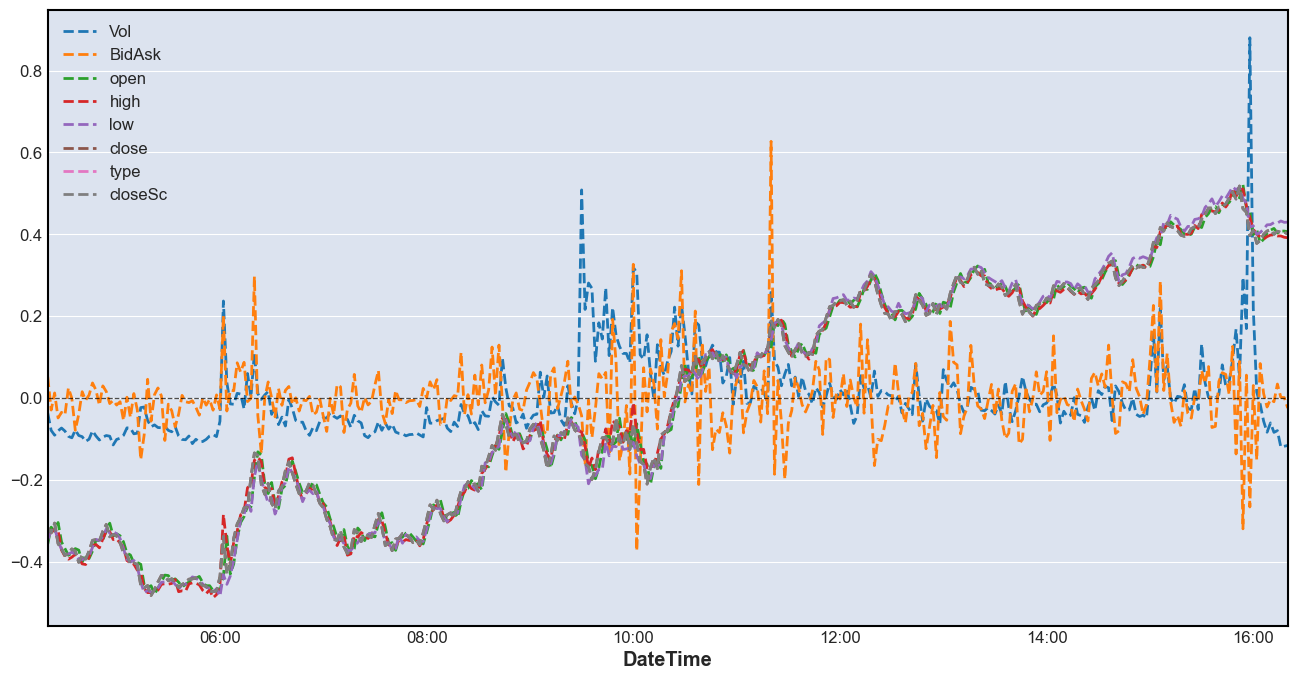

In [276]:
# centered_close_series.sort_index(inplace= True)
centered_close_series['2022-09-28 04:20:00': '2022-09-28 16:20:00'].plot( figsize=(16,8), linestyle = '--', linewidth= 2)
plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)
plt.show()

##### interesting because normalized BidAsk shows presence above the 0, showing heightened Buying pushing Price Up

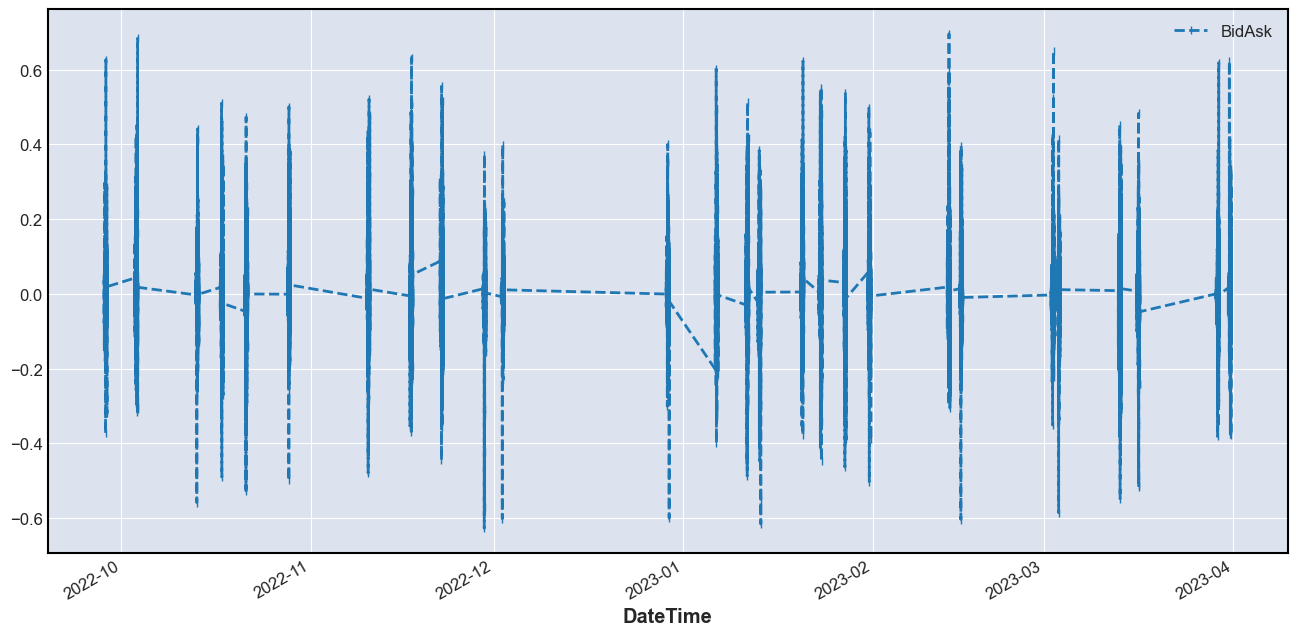

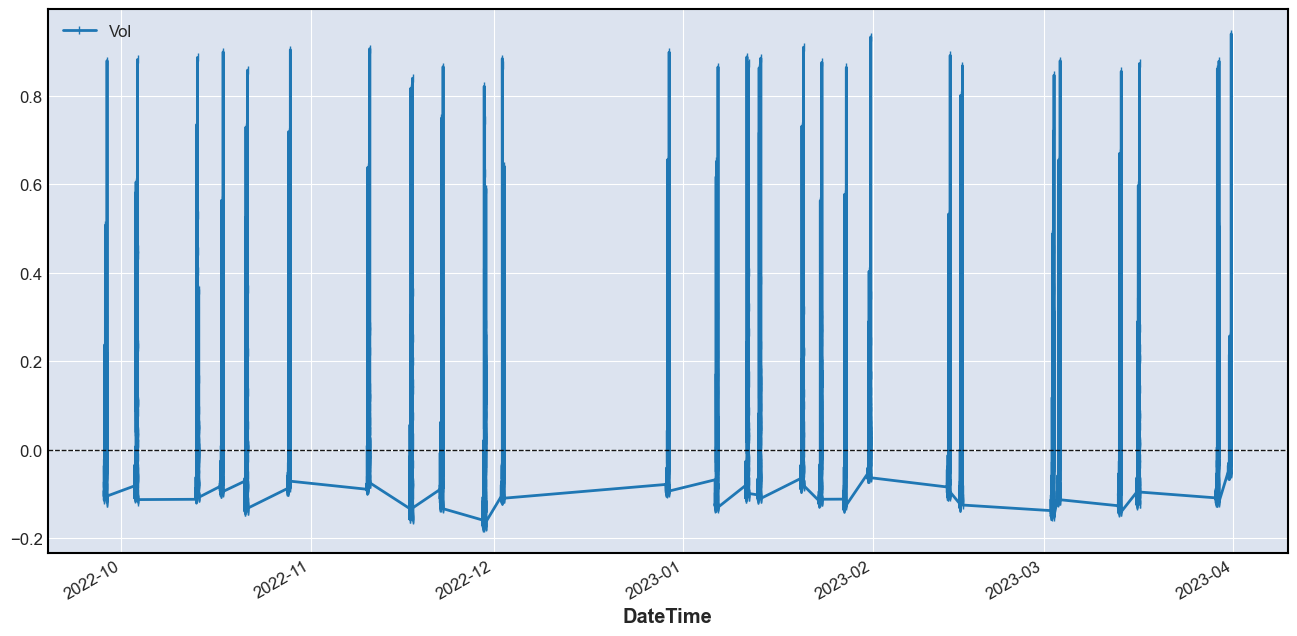

In [270]:
# centered_close_series.sort_index(inplace= True)
centered_close_series.plot(y=['BidAsk'], figsize=(16,8), linestyle = '--', linewidth= 2, marker='|')
centered_close_series.plot(y=[ 'Vol'], figsize=(16,8), linestyle = '-', linewidth= 2, marker='|')
plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)
plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)
plt.show()

c:\Users\tonya\anaconda3\envs\quantra_py\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


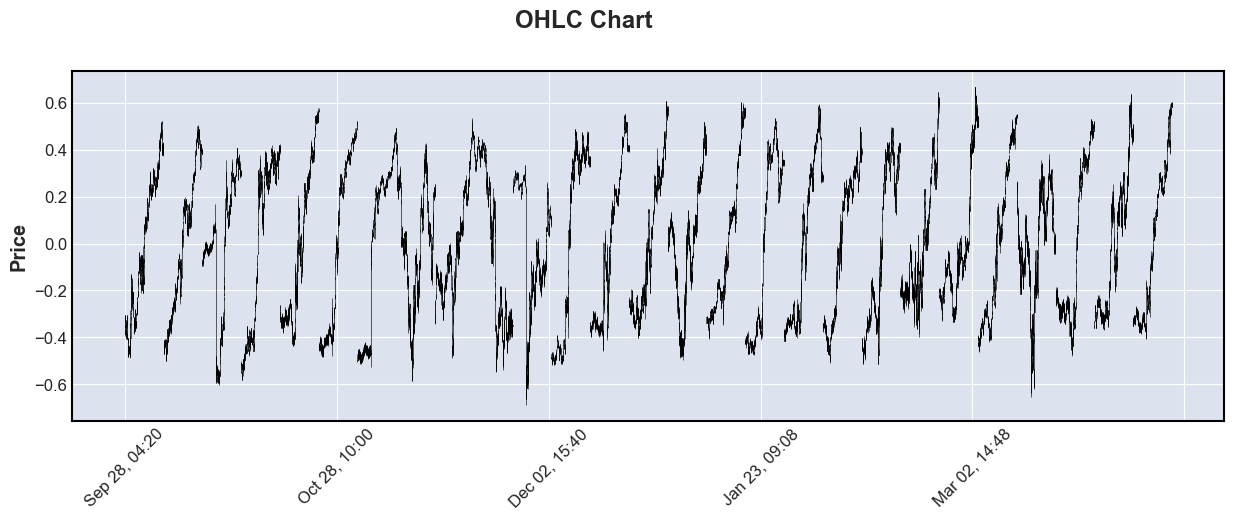

In [247]:
mpf.plot(centered_close_series, type='candle', style='default',  title='OHLC Chart', figsize=(16, 5)) 

In [250]:
import plotly.graph_objects as go
hovertext=[]
for i in range(len(centered_close_series['open'])):
    hovertext.append('open: '+ str(centered_close_series['open'][i])+'<br>close: '+ str(centered_close_series['close'][i]))
    
fig = go.Figure(data= go.Ohlc(x= centered_close_series.index, open= centered_close_series['open'], high= centered_close_series['high'],  
                low= centered_close_series['low'], close= centered_close_series['close'], text= hovertext, hoverinfo= 'text'))
fig.show()

In [404]:
df = centered_close_series.copy()

In [259]:
# df = centered_close_series.copy()
df.head()
df.shape   #(9882, 8)
# Replace 'inf' values with 'NaN'
# df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.shape 
df.drop('type', axis=1, inplace=True)
# Identify columns with NaN values and count them
nan_columns = df.isna().any()
nan_columns_count = nan_columns.sum()
print("Columns with NaN values:")
print(nan_columns)
print(f"Total columns with NaN values: {nan_columns_count}")

Columns with NaN values:
Vol        False
BidAsk     False
open       False
high       False
low        False
close      False
closeSc    False
dtype: bool
Total columns with NaN values: 0


Singular values for the 9-10 hour: [1.74390046e+01 6.41675047e+00 4.11441040e+00 7.40039601e-01
 4.98415472e-01 3.82528838e-01 3.18049757e-13]
Singular values for the 10-11 hour: [1.06587798e+01 5.07795310e+00 4.57905563e+00 6.18794640e-01
 4.02789151e-01 3.21306329e-01 3.19150945e-13]


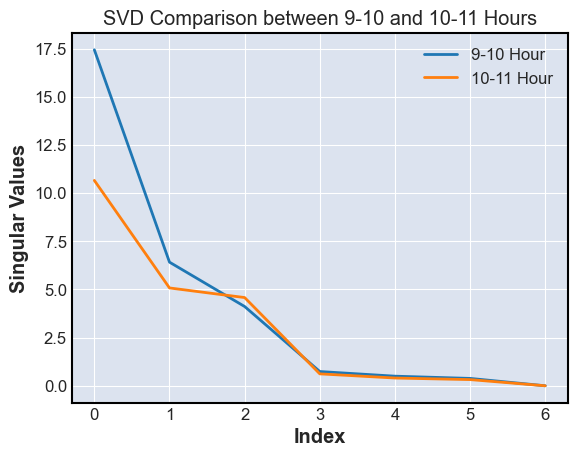

In [260]:
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has columns 'Date' and 'Close'
# Make sure the 'Date' column is set as the index and is a datetime object
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Filter the DataFrame for the hours between 9-10 and 10-11
df_9_to_10 = df.between_time('9:00', '10:00')
df_10_to_11 = df.between_time('10:00', '11:00')

# Calculate the SVD values for both filtered DataFrames
U_9_to_10, s_9_to_10, Vh_9_to_10 = svd(df_9_to_10)
U_10_to_11, s_10_to_11, Vh_10_to_11 = svd(df_10_to_11)

# Compare the SVD values
print("Singular values for the 9-10 hour:", s_9_to_10)
print("Singular values for the 10-11 hour:", s_10_to_11)

# Plot the SVD values using matplotlib
plt.plot(s_9_to_10, label="9-10 Hour")
plt.plot(s_10_to_11, label="10-11 Hour")
plt.xlabel("Index")
plt.ylabel("Singular Values")
plt.title("SVD Comparison between 9-10 and 10-11 Hours")
plt.legend()
plt.show()


In [262]:
df.head()

,Vol,BidAsk,open,high,low,close,closeSc
DateTime,,,,,,,
2022-09-28 04:20:00,-0.036734,0.051955,-0.356201,-0.333017,-0.346673,-0.316092,-0.316092
2022-09-28 04:22:00,-0.078964,-0.029142,-0.315187,-0.328664,-0.322943,-0.329023,-0.329023
2022-09-28 04:24:00,-0.090596,0.012599,-0.325440,-0.319415,-0.316872,-0.305316,-0.305316
2022-09-28 04:26:00,-0.079975,-0.048522,-0.303854,-0.323223,-0.348881,-0.355424,-0.355424
2022-09-28 04:28:00,-0.073085,-0.034807,-0.351344,-0.371102,-0.368748,-0.368355,-0.368355


Singular values for the 9-10 hour: [1.74390046e+01 6.41675047e+00 4.11441040e+00 7.40039601e-01
 4.98415472e-01 3.82528838e-01 3.18049757e-13]
Singular values for the 10-11 hour: [1.06587798e+01 5.07795310e+00 4.57905563e+00 6.18794640e-01
 4.02789151e-01 3.21306329e-01 3.19150945e-13]


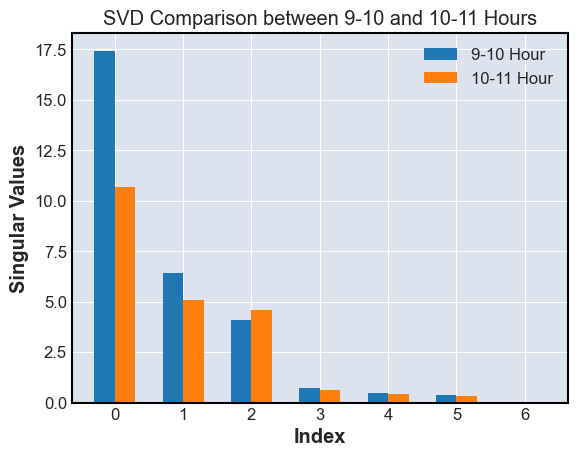

In [263]:

from scipy.linalg import svd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has columns 'Date' and 'Close'
# Make sure the 'Date' column is set as the index and is a datetime object
# df['DateTime'] = pd.to_datetime(df['DateTime'])
# df.set_index('Date', inplace=True)

# Filter the DataFrame for the hours between 9-10 and 10-11
df_9_to_10 = df.between_time('9:00', '10:00')
df_10_to_11 = df.between_time('10:00', '11:00')

# Calculate the SVD values for both filtered DataFrames
U_9_to_10, s_9_to_10, Vh_9_to_10 = svd(df_9_to_10)
U_10_to_11, s_10_to_11, Vh_10_to_11 = svd(df_10_to_11)

# Compare the SVD values
print("Singular values for the 9-10 hour:", s_9_to_10)
print("Singular values for the 10-11 hour:", s_10_to_11)

# Plot the SVD values using matplotlib
bar_width = 0.3
index = np.arange(len(s_9_to_10))

plt.bar(index, s_9_to_10, width=bar_width, label="9-10 Hour")
plt.bar(index + bar_width, s_10_to_11, width=bar_width, label="10-11 Hour")
plt.xlabel("Index")
plt.ylabel("Singular Values")
plt.title("SVD Comparison between 9-10 and 10-11 Hours")
plt.xticks(index + bar_width/2, index)
plt.legend()
plt.show()


Singular values for the 9-10 hour: [1.74390046e+01 6.41675047e+00 4.11441040e+00 7.40039601e-01
 4.98415472e-01 3.82528838e-01 3.18049757e-13]
Singular values for the 10-11 hour: [2.64994953e+01 4.93077856e+00 3.47466585e+00 5.06945727e-01
 4.12050341e-01 2.47106009e-01 3.21194732e-13]


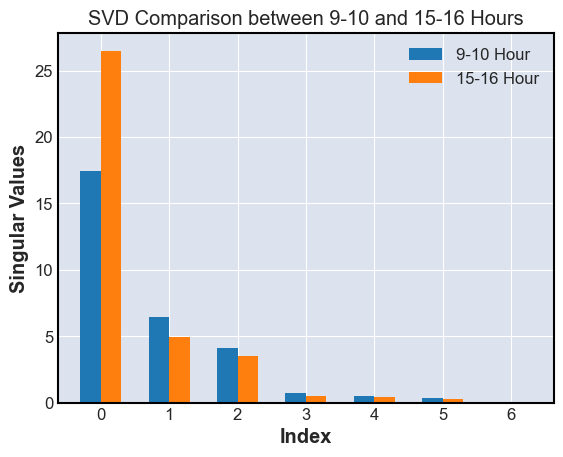

In [279]:

from scipy.linalg import svd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has columns 'Date' and 'Close'
# Make sure the 'Date' column is set as the index and is a datetime object
# df['DateTime'] = pd.to_datetime(df['DateTime'])
# df.set_index('Date', inplace=True)

# Filter the DataFrame for the hours between 9-10 and 10-11
df_9_to_10 = df.between_time('9:00', '10:00')
df_15_to_16 = df.between_time('15:00', '16:00')

# Calculate the SVD values for both filtered DataFrames
U_9_to_10, s_9_to_10, Vh_9_to_10 = svd(df_9_to_10)
U_15_to_16, s_15_to_16, Vh_15_to_16 = svd(df_15_to_16)

# Compare the SVD values
print("Singular values for the 9-10 hour:", s_9_to_10)
print("Singular values for the 10-11 hour:", s_15_to_16)

# Plot the SVD values using matplotlib
bar_width = 0.3
index = np.arange(len(s_9_to_10))

plt.bar(index, s_9_to_10, width=bar_width, label="9-10 Hour")
plt.bar(index + bar_width, s_15_to_16, width=bar_width, label="15-16 Hour")
plt.xlabel("Index")
plt.ylabel("Singular Values")
plt.title("SVD Comparison between 9-10 and 15-16 Hours")
plt.xticks(index + bar_width/2, index)
plt.legend()
plt.show()


In [405]:
df.head()

,Vol,BidAsk,open,high,low,close,type,closeSc
DateTime,,,,,,,,
2022-09-28 04:20:00,-0.036734,0.051955,-0.356201,-0.333017,-0.346673,-0.316092,NaN,-0.316092
2022-09-28 04:22:00,-0.078964,-0.029142,-0.315187,-0.328664,-0.322943,-0.329023,NaN,-0.329023
2022-09-28 04:24:00,-0.090596,0.012599,-0.325440,-0.319415,-0.316872,-0.305316,NaN,-0.305316
2022-09-28 04:26:00,-0.079975,-0.048522,-0.303854,-0.323223,-0.348881,-0.355424,NaN,-0.355424
2022-09-28 04:28:00,-0.073085,-0.034807,-0.351344,-0.371102,-0.368748,-0.368355,NaN,-0.368355


### Calculate SVD for 10-12 vs 9-10 on BidAsk and Volume

Singular values for the 9-10 hour: [6.699911   4.05196405]
Singular values for the 10-11 hour: [6.43822247 5.75242577]


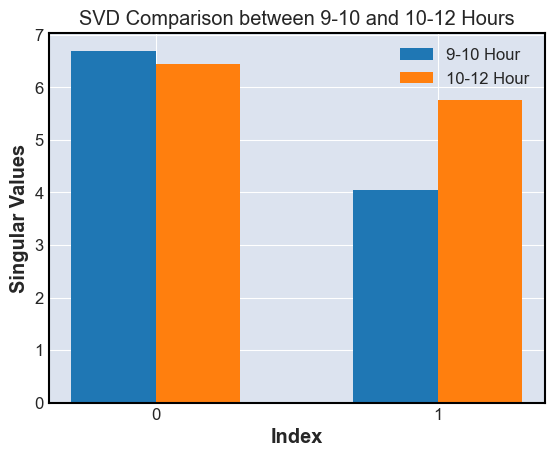

In [292]:
from scipy.linalg import svd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has columns 'Date' and 'Close'
# Make sure the 'Date' column is set as the index and is a datetime object
# df['DateTime'] = pd.to_datetime(df['DateTime'])
# df.set_index('Date', inplace=True)

# Filter the DataFrame for the hours between 9-10 and 10-11
df_9_to_10 = df[['BidAsk','Vol']].between_time('9:00', '10:00')
df_15_to_16 = df[['BidAsk','Vol']].between_time('10:00', '12:00')

# Calculate the SVD values for both filtered DataFrames
U_9_to_10, s_9_to_10, Vh_9_to_10 = svd(df_9_to_10)
U_15_to_16, s_15_to_16, Vh_15_to_16 = svd(df_15_to_16)

# Compare the SVD values
print("Singular values for the 9-10 hour:", s_9_to_10)
print("Singular values for the 10-11 hour:", s_15_to_16)

# Plot the SVD values using matplotlib
bar_width = 0.3
index = np.arange(len(s_9_to_10))

plt.bar(index, s_9_to_10, width= bar_width, label= "9-10 Hour")
plt.bar(index + bar_width, s_15_to_16, width= bar_width, label= "10-12 Hour")
plt.xlabel("Index")
plt.ylabel("Singular Values")
plt.title("SVD Comparison between 9-10 and 10-12 Hours")
plt.xticks(index + bar_width/2, index)
plt.legend()
plt.show()


Singular values for the 9-10 hour: [6.699911   4.05196405]
Singular values for the 10-11 hour: [5.48025785 3.46584907]


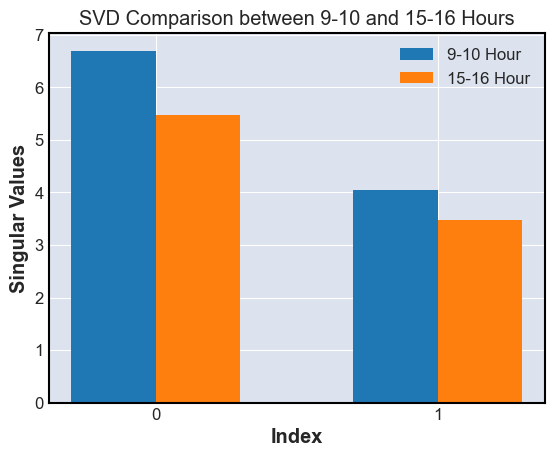

In [290]:

from scipy.linalg import svd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has columns 'Date' and 'Close'
# Make sure the 'Date' column is set as the index and is a datetime object
# df['DateTime'] = pd.to_datetime(df['DateTime'])
# df.set_index('Date', inplace=True)

# Filter the DataFrame for the hours between 9-10 and 10-11
df_9_to_10 = df[['BidAsk','Vol']].between_time('9:00', '10:00')
df_15_to_16 = df[['BidAsk','Vol']].between_time('15:00', '16:00')

# Calculate the SVD values for both filtered DataFrames
U_9_to_10, s_9_to_10, Vh_9_to_10 = svd(df_9_to_10)
U_15_to_16, s_15_to_16, Vh_15_to_16 = svd(df_15_to_16)

# Compare the SVD values
print("Singular values for the 9-10 hour:", s_9_to_10)
print("Singular values for the 10-11 hour:", s_15_to_16)

# Plot the SVD values using matplotlib
bar_width = 0.3
index = np.arange(len(s_9_to_10))

plt.bar(index, s_9_to_10, width= bar_width, label= "9-10 Hour")
plt.bar(index + bar_width, s_15_to_16, width= bar_width, label= "15-16 Hour")
plt.xlabel("Index")
plt.ylabel("Singular Values")
plt.title("SVD Comparison between 9-10 and 15-16 Hours")
plt.xticks(index + bar_width/2, index)
plt.legend()
plt.show()


In [ ]:
df.plot(y='close',figsize=(16,4), linestyle = None, lw=3, c='red')
plt.axhline(y= 0, linewidth= 0.9, linestyle = '-', color='black', alpha=0.7)  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

To test your hypotheses, you can use statistical hypothesis tests that compare the distributions of two samples. In this case, you can use the two-sample Kolmogorov-Smirnov (KS) test, which is a non-parametric test to compare the distributions of two samples. If the p-value is less than your chosen significance level (e.g., 0.05), you reject the null hypothesis in favor of the alternative hypothesis.

Here's a step-by-step guide to perform the KS test on your time series data:

Filter your DataFrame to obtain data between 9-10 and 10-16 for each type of day.
Perform the KS test on each pair of samples (9-10 vs 10-16) for each type of day.
Evaluate the p-values.
Here's an example of how you can perform these steps using Python and Pandas:

In [ ]:
import pandas as pd
from scipy.stats import ks_2samp

# Assuming your DataFrame is named 'df' and has columns 'timestamp' and 'value'
# Replace 'DayType' with the appropriate column name for the day types in your DataFrame

# Set your significance level
alpha = 0.05

for day_type in df['DayType'].unique():
    # Filter the data for the current day type
    data = df[df['DayType'] == day_type]
    
    # Extract data for hours 9-10 and 10-16
    data_9_to_10 = data[(data['timestamp'].dt.hour >= 9) & (data['timestamp'].dt.hour < 10)]
    data_10_to_16 = data[(data['timestamp'].dt.hour >= 10) & (data['timestamp'].dt.hour < 16)]

    # Perform the KS test
    statistic, p_value = ks_2samp(data_9_to_10['value'], data_10_to_16['value'])

    # Print the p-value
    print(f"Day type: {day_type}, p-value: {p_value}")

    # Evaluate the p-value
    if p_value < alpha:
        print(f"Reject the null hypothesis for day type {day_type}. Distributions are different.")
    else:
        print(f"Fail to reject the null hypothesis for day type {day_type}. Distributions are the same.")


ANOVA (Analysis of Variance) is a statistical test that compares the means of multiple groups to determine if there are significant differences between them. In your case, you want to compare the means of five data frames, each representing a different type of 'Day'.

Before performing ANOVA, make sure your data meets the following assumptions:

The samples are independent.
The samples are normally distributed (or approximately so).
The samples have equal variances (homoscedasticity).
Here's a step-by-step guide to perform ANOVA using Python and Pandas:

Combine the five data frames into a single data frame with an additional column indicating the 'Day' type.
Perform one-way ANOVA using the scipy.stats library.
Evaluate the p-value.
Here's an example of how to perform these steps:

In [ ]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming your data frames are named df1, df2, df3, df4, df5
# And each data frame has a column 'value' that you want to compare

# Add a 'DayType' column to each data frame
df1['DayType'] = 'Day1'
df2['DayType'] = 'Day2'
df3['DayType'] = 'Day3'
df4['DayType'] = 'Day4'
df5['DayType'] = 'Day5'

# Combine the data frames
combined_df = pd.concat([df1, df2, df3, df4, df5])

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(df1['value'], df2['value'], df3['value'], df4['value'], df5['value'])

# Print the p-value
print(f"p-value: {p_value}")

# Set your significance level
alpha = 0.05

# Evaluate the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the means.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the means.")
#This code snippet assumes that each data frame (df1, df2, df3, df4, and df5) has a 'value' column that you want to compare. Modify the code as needed to match your data frame structure.

#If your data does not meet the assumptions of ANOVA, you can consider using a non-parametric alternative, such as the Kruskal-Wallis test.

This code snippet assumes that each data frame (df1, df2, df3, df4, and df5) has a 'value' column that you want to compare. Modify the code as needed to match your data frame structure.

Keep in mind that the Kruskal-Wallis test is less powerful than ANOVA when the assumptions of ANOVA are met. Therefore, it's generally preferable to use ANOVA when the data meets its assumptions, and Kruskal-Wallis when it does not.

The Kruskal-Wallis test is a non-parametric alternative to one-way ANOVA, which can be used when the assumptions of normality and equal variances are not met. It compares the medians of multiple independent samples to determine if there are significant differences between them.

Here's a step-by-step guide to perform the Kruskal-Wallis test using Python and Pandas:

Combine the five data frames into a single data frame with an additional column indicating the 'Day' type.
Perform the Kruskal-Wallis test using the scipy.stats library.
Evaluate the p-value.
Here's an example of how to perform these steps:

In [ ]:
import pandas as pd
from scipy.stats import kruskal

# Assuming your data frames are named df1, df2, df3, df4, df5
# And each data frame has a column 'value' that you want to compare

# Add a 'DayType' column to each data frame
df1['DayType'] = 'Day1'
df2['DayType'] = 'Day2'
df3['DayType'] = 'Day3'
df4['DayType'] = 'Day4'
df5['DayType'] = 'Day5'

# Combine the data frames
combined_df = pd.concat([df1, df2, df3, df4, df5])

# Perform the Kruskal-Wallis test
h_statistic, p_value = kruskal(df1['value'], df2['value'], df3['value'], df4['value'], df5['value'])

# Print the p-value
print(f"p-value: {p_value}")

# Set your significance level
alpha = 0.05

# Evaluate the p-value
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between the medians.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences between the medians.")


To build and train an Artificial Neural Network (ANN) to classify the type of 'Day' based on the data between 9-10, you can use the following steps:

Preprocess the data.
Split the data into training and testing sets.
Build and train the ANN model.
Evaluate the model on the testing set.
Here's an example using Python, Pandas, and TensorFlow with the Keras API:

This code assumes that each data frame (df1, df2, df3, df4, and df5) has a 'timestamp' column of datetime type and a 'value' column for the time series data. Modify the code as needed to match your data frame structure and include any additional features you want to use for classification.

The example shown here uses a simple feedforward neural network with two hidden layers of 64 neurons each. The input shape of the first layer should match the number of features in your dataset (in this case, 1). The output layer uses softmax activation for multi-class classification. You can experiment with different architectures, the number of layers, and the number of neurons in each layer to achieve the desired level of overfit


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Assuming your data frames are named df1, df2, df3, df4, df5
# And each data frame has a column 'timestamp' and a column 'value'

# Add a 'DayType' column to each data frame
df1['DayType'] = 'Day1'
df2['DayType'] = 'Day2'
df3['DayType'] = 'Day3'
df4['DayType'] = 'Day4'
df5['DayType'] = 'Day5'

# Combine the data frames
combined_df = pd.concat([df1, df2, df3, df4, df5])

# Filter the data to keep only records between 9-10
filtered_df = combined_df[(combined_df['timestamp'].dt.hour >= 9) & (combined_df['timestamp'].dt.hour < 10)]

# Preprocess the data
X = filtered_df[['value']]  # Modify this line to include other features if needed
y = filtered_df['DayType']

# Scale the feature(s)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y = to_categorical(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)

# Evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# Make predictions (probabilities)
y_pred_proba = model.predict(X_test)

# Get the predicted class labels
y_pred = np.argmax(y_pred_proba, axis=1)


To build a RandomForest model to classify the type of 'Day' based on the data between 9-10, you can follow these steps:

Preprocess the data.
Split the data into training and testing sets.
Build and train the RandomForest model.
Evaluate the model on the testing set.
Here's an example using Python, Pandas, and scikit-learn:
This code assumes that each data frame (df1, df2, df3, df4, and df5) has a 'timestamp' column of datetime type and a 'value' column for the time series data. Modify the code as needed to match your data frame structure and include any additional features you want to use for classification.

The example shown here uses a RandomForest model with 100 trees. You can experiment with different numbers of trees (n_estimators) and other hyperparameters to fine-tune your model.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming your data frames are named df1, df2, df3, df4, df5
# And each data frame has a column 'timestamp' and a column 'value'

# Add a 'DayType' column to each data frame
df1['DayType'] = 'Day1'
df2['DayType'] = 'Day2'
df3['DayType'] = 'Day3'
df4['DayType'] = 'Day4'
df5['DayType'] = 'Day5'

# Combine the data frames
combined_df = pd.concat([df1, df2, df3, df4, df5])

# Filter the data to keep only records between 9-10
filtered_df = combined_df[(combined_df['timestamp'].dt.hour >= 9) & (combined_df['timestamp'].dt.hour < 10)]

# Preprocess the data
X = filtered_df[['value']]  # Modify this line to include other features if needed
y = filtered_df['DayType']

# Scale the feature(s)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")


To build a Support Vector Machine (SVM) model to classify the type of 'Day' based on the data between 9-10, you can follow these steps:

Preprocess the data.
Split the data into training and testing sets.
Build and train the SVM model.
Evaluate the model on the testing set.



This code assumes that each data frame (df1, df2, df3, df4, and df5) has a 'timestamp' column of datetime type and a 'value' column for the time series data. Modify the code as needed to match your data frame structure and include any additional features you want to use for classification.

The example shown here uses an SVM model with a linear kernel and a regularization parameter (C) of 1. You can experiment with different kernels (e.g., 'rbf', 'poly', or 'sigmoid') and values of C to fine-tune your model.

Here's an example using Python, Pandas, and scikit-learn:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming your data frames are named df1, df2, df3, df4, df5
# And each data frame has a column 'timestamp' and a column 'value'

# Add a 'DayType' column to each data frame
df1['DayType'] = 'Day1'
df2['DayType'] = 'Day2'
df3['DayType'] = 'Day3'
df4['DayType'] = 'Day4'
df5['DayType'] = 'Day5'

# Combine the data frames
combined_df = pd.concat([df1, df2, df3, df4, df5])

# Filter the data to keep only records between 9-10
filtered_df = combined_df[(combined_df['timestamp'].dt.hour >= 9) & (combined_df['timestamp'].dt.hour < 10)]

# Preprocess the data
X = filtered_df[['value']]  # Modify this line to include other features if needed
y = filtered_df['DayType']

# Scale the feature(s)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the SVM model
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")


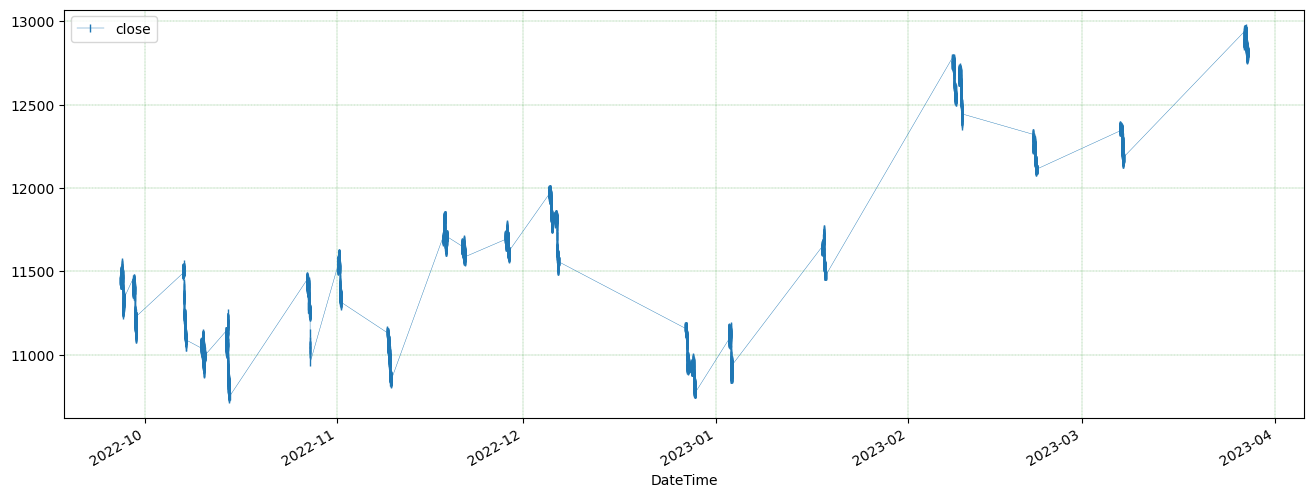

In [11]:
nqD.plot( y=['close' ], figsize=(16,6), marker='|',  linewidth= 0.3)   
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()
# esD.plot( y=['scaled' ], figsize=(16,6), marker='|', linestyle='none', linewidth= 0.3)  
# plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 

In [3]:
directory_path =  r"C:\Repo\U_55"   
dfs = []
for file in os.listdir(directory_path):
    if file.endswith('.pickle'):
        df = pd.read_pickle(os.path.join(directory_path, file))
        dfs.append(df)
up_df = pd.concat(dfs, axis= 0)

In [4]:
up_df.head()

,Vol,BidAsk,open,high,low,close,day,type
2022-12-12 04:20:00,236.0,32.0,3967.25,3968.25,3967.25,3967.50,Up,5
2022-12-12 04:22:00,238.0,-26.0,3967.50,3967.50,3966.00,3966.00,Up,5
2022-12-12 04:24:00,275.0,1.0,3966.00,3967.00,3965.50,3966.50,Up,5
2022-12-12 04:26:00,293.0,22.0,3966.50,3966.75,3965.75,3966.25,Up,5
2022-12-12 04:28:00,388.0,1.0,3966.25,3967.00,3965.75,3966.50,Up,5


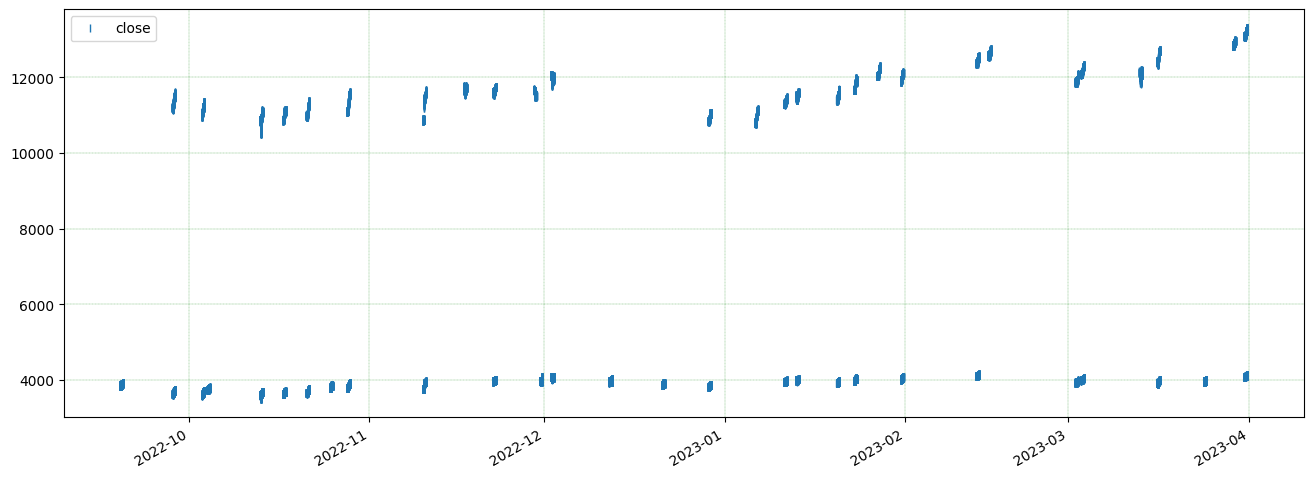

In [6]:
up_df.plot( y=['close' ], figsize=(16,6), marker='|',  linestyle='none', linewidth= 0.3)   
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

In [23]:
# up_df.index.name = 'DateTime'
# up_df = up_df.reset_index().set_index('DateTime')
up_df.shape   # (20116, 8)
# up_df['closeSc'] = stats.zscore(up_df['close'])
# up_df.shape   # (20116, 9)
# up_df.tail()
up_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20116 entries, 2022-12-12 04:20:00 to 2022-12-02 16:30:00
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Vol      20116 non-null  float64
 1   BidAsk   20116 non-null  float64
 2   open     20116 non-null  float64
 3   high     20116 non-null  float64
 4   low      20116 non-null  float64
 5   close    20116 non-null  float64
 6   day      20116 non-null  object 
 7   type     20116 non-null  int64  
 8   closeSc  20116 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.5+ MB


In [ ]:

# close_series.index = pd.to_datetime(close_series.index)

# Group by day and find min and max close values
daily_min = nq_Up.groupby(nq_Up.index.date).min()
daily_max = nq_Up.groupby(nq_Up.index.date).max()

# Define the min-max scaling function
def min_max_scale(value, min_value, max_value):
    return (value - min_value) / (max_value - min_value)

# Apply the min-max scaling function to each day's 'Close' value
scaled_close_series = close_series.groupby(close_series.index.date).apply(
    lambda group: group.apply(min_max_scale, args=(daily_min[group.name], daily_max[group.name]))
)

# Display the resulting scaled Series
print(scaled_close_series)


In [214]:
# nq_Up = up_df[up_df['close'] > 7000]
# nqDays = pd.to_datetime(pd.Series(nq_Up.index.date)).dt.date.nunique()      # 27   0.879489
# nq_Up = nq_Up.sort_index().head()
nq_Up['2022-09-28 04:20:00':'2022-09-28 16:20:00'].min()

Vol           599.0
BidAsk       -146.0
open        11204.0
high        11207.5
low        11193.75
close       11199.0
day              Up
type              5
closeSc    0.873341
dtype: object

In [117]:
# 1st option
unique_index = pd.unique(nq_Up1.index)
new_df = nq_Up1.reindex(unique_index)
new_df.shape
# 2nd option
# df_reset = df.reset_index()
# new_df = df_reset.reindex([0, 1, 2])


(9882, 9)

In [116]:
# def min_max_scale2(series):
#     min_value = series.min()
#     daily_min = df.groupby(df.index.date)['Close'].min()
#     daily_max = df.groupby(df.index.date)['Close'].max()
    
#     max_value = series.max()
#     return (series - min_value) / (max_value - min_value)


# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# Group by day and find min and max close values
daily_min = df.groupby(df.index.date)['close'].min()
daily_max = df.groupby(df.index.date)['close'].max()

# Combine the min and max close values into a single DataFrame
daily_min_max = pd.concat([daily_min, daily_max], axis=1)
daily_min_max.columns = ['Min_Close', 'Max_Close']

# Display the resulting DataFrame
print(daily_min_max)

9882

In [121]:
# nq_Up1 = nq_Up.copy()
nq_Up1.head()
# nq_Up1.sort_index(inplace=True)
# new_df['closeSc3'] = stats.zscore(new_df['close'])
# new_df['closeSc_byDay'] = new_df.groupby(new_df.index.to_period('D'))['close'].transform(min_max_scale)
new_df.head()
# new_df.shape  #(9882, 12)

,Vol,BidAsk,open,high,low,close,day,type,closeSc,closeSc2,closeSc3,closeSc_byDay
DateTime,,,,,,,,,,,,
2022-09-28 04:20:00,1451.0,191.0,11204.00,11225.00,11203.75,11223.25,Up,5,0.879489,-0.841188,-0.841188,0.165948
2022-09-28 04:22:00,783.0,-81.0,11223.00,11227.00,11214.50,11217.25,Up,5,0.877968,-0.850904,-0.850904,0.153017
2022-09-28 04:24:00,599.0,59.0,11218.25,11231.25,11217.25,11228.25,Up,5,0.880757,-0.833090,-0.833090,0.176724
2022-09-28 04:26:00,767.0,-146.0,11228.25,11229.50,11202.75,11205.00,Up,5,0.874862,-0.870743,-0.870743,0.126616
2022-09-28 04:28:00,876.0,-100.0,11206.25,11207.50,11193.75,11199.00,Up,5,0.873341,-0.880459,-0.880459,0.113685


In [ ]:
# df['scaled_directly'] = stats.zscore(df['value'])
nq_Up1['scaled_value'] = nq_Up1.groupby(nq_Up1.index.to_period('D'))['close'].transform(min_max_scale)
df.plot(y=  ['scaled_value', 'scaled_directly'])
plt.show()

In [100]:
# doo = nq_Up1.groupby(nq_Up1.index.to_period('D'))['close'].transform(min_max_scale)
print(len(doo))  #  9882
# doo = pd.DataFrame(doo)
doo.head()        #        2022-09-28 04:20:00    0.165948

# doo.tail()         #    2023-03-31 16:30:00    0.985597


9882


DateTime
2022-09-28 04:20:00    0.165948
2022-09-28 04:22:00    0.153017
2022-09-28 04:24:00    0.176724
2022-09-28 04:26:00    0.126616
2022-09-28 04:28:00    0.113685
Name: close, dtype: float64

In [34]:
# nqZscore = pd.DataFrame()
# nqZscore['Zscored'] = stats.zscore(nq_Up['2022-12-29 04:20:00':'2022-12-29 16:30:00']['close'])
nqZscore.head()

,Zscored
DateTime,
2022-12-29 04:20:00,-1.256734
2022-12-29 04:22:00,-1.210061
2022-12-29 04:24:00,-1.199079
2022-12-29 04:26:00,-1.262225
2022-12-29 04:28:00,-1.286935


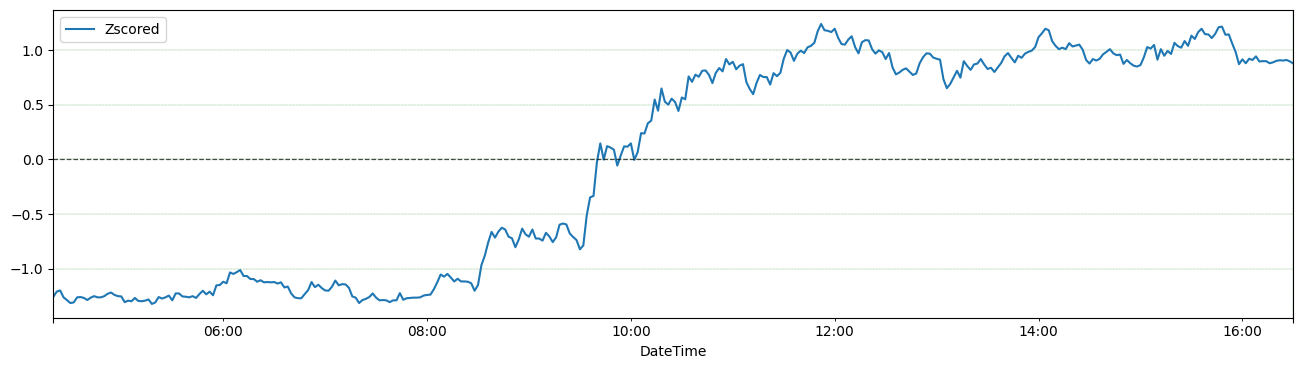

In [35]:
nqZscore.plot(y='Zscored',figsize=(16,4))
plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

In [127]:
new_df.tail()

,Vol,BidAsk,open,high,low,close,day,type,closeSc,closeSc2,closeSc3,closeSc_byDay
DateTime,,,,,,,,,,,,
2023-03-31 16:22:00,282.0,79.0,13306.75,13308.75,13306.25,13306.75,Up,5,1.407718,2.532929,2.532929,0.994856
2023-03-31 16:24:00,201.0,-15.0,13306.75,13307.75,13305.50,13306.50,Up,5,1.407655,2.532524,2.532524,0.993827
2023-03-31 16:26:00,191.0,38.0,13306.50,13307.50,13305.25,13306.75,Up,5,1.407718,2.532929,2.532929,0.994856
2023-03-31 16:28:00,349.0,21.0,13307.00,13308.00,13306.00,13308.00,Up,5,1.408035,2.534953,2.534953,1.000000
2023-03-31 16:30:00,233.0,-77.0,13308.25,13308.25,13304.25,13304.50,Up,5,1.407148,2.529285,2.529285,0.985597


<AxesSubplot:xlabel='DateTime'>

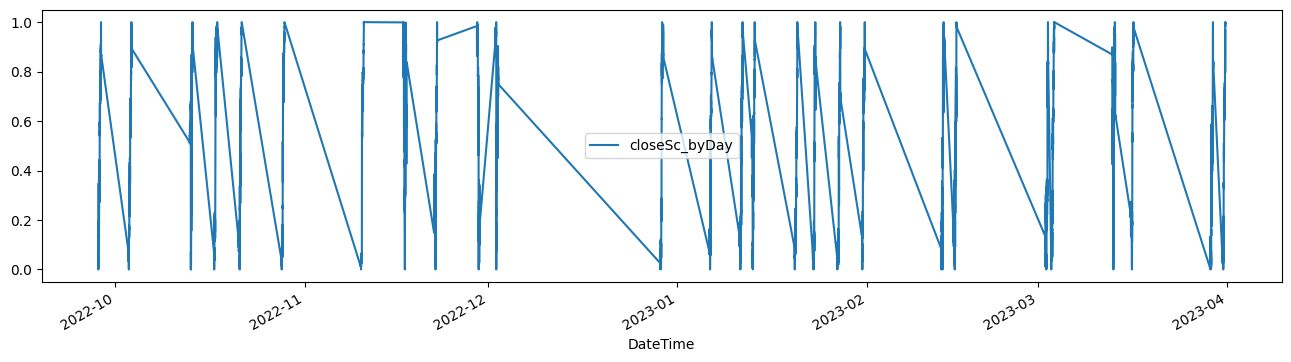

In [126]:
new_df.plot(y='closeSc_byDay',figsize=(16,4))

In [105]:
doo.head()
doo['zcsored'] = stats.zscore(doo)

DateTime
2022-09-28 04:20:00    0.165948
2022-09-28 04:22:00    0.153017
2022-09-28 04:24:00    0.176724
2022-09-28 04:26:00    0.126616
2022-09-28 04:28:00    0.113685
Name: close, dtype: float64

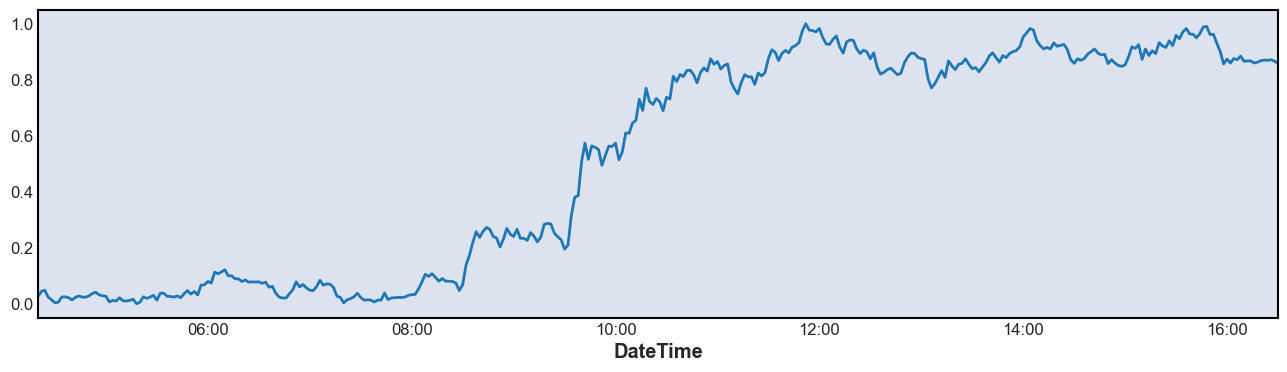

In [411]:
doo['2022-12-29 04:20:00':'2022-12-29 16:40:00'].plot(y='close',figsize=(16,4))
# doo.plot(y='close',figsize=(16,4))

# plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

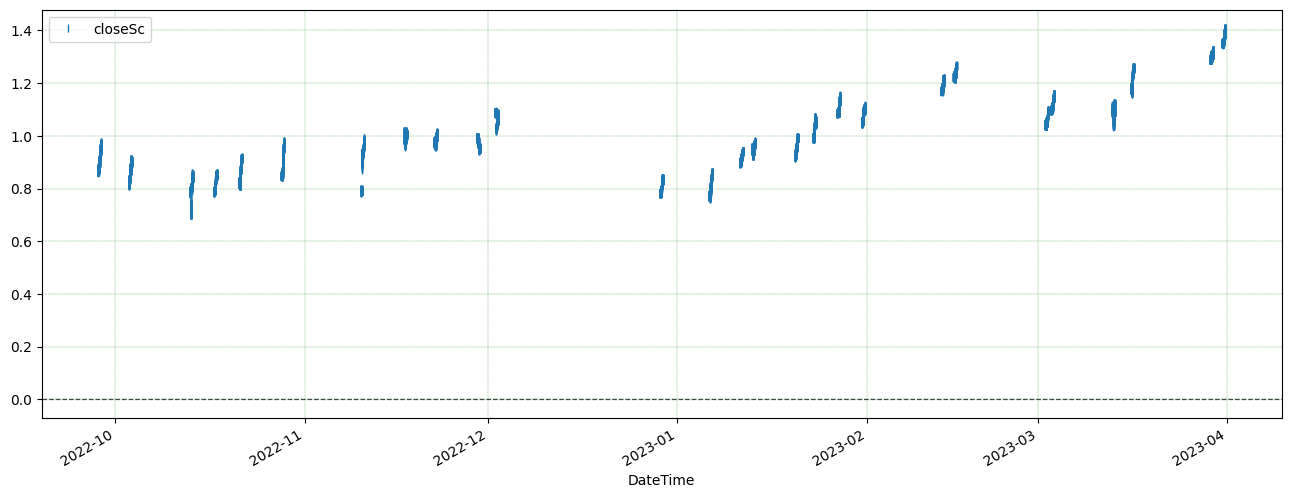

In [26]:
nq_Up.plot(  y='closeSc' , figsize=(16,6), marker='|',  linestyle='none', linewidth= 0.8) 
plt.axhline(y= 0, linewidth= 0.9, linestyle = '--', color='black', alpha=0.7)  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 
plt.show()

In [19]:
up_df.shape   # (20116, 8)
up_df.head()
# rdDays = pd.to_datetime(pd.Series(up_df.index.date)).dt.date.nunique() #  34 unique days
# nqUp = up_df[up_df['close'] > 6000]
# esUp = up_df[up_df['close'] < 6000]
nqUp.shape    #(9882, 8)
esUp.shape    #(10234, 8)
# nqDays = pd.to_datetime(pd.Series(nqUp.index.date)).dt.date.nunique() #  27
# esDays = pd.to_datetime(pd.Series(esUp.index.date)).dt.date.nunique() #  27


27

In [68]:
# nqUp.index.name = 'DateTime'
nq_Up.head()
# type(nq_Up.index)

,Vol,BidAsk,open,high,low,close,day,type,closeSc
DateTime,,,,,,,,,
2022-12-29 04:20:00,287.0,-9.0,10837.25,10841.50,10837.00,10838.25,Up,5,0.781880
2022-12-29 04:22:00,248.0,40.0,10838.25,10844.00,10838.25,10842.50,Up,5,0.782958
2022-12-29 04:24:00,312.0,3.0,10842.50,10845.00,10841.00,10843.50,Up,5,0.783211
2022-12-29 04:26:00,269.0,-63.0,10844.00,10844.75,10837.00,10837.75,Up,5,0.781754
2022-12-29 04:28:00,211.0,-64.0,10837.00,10838.00,10834.50,10835.50,Up,5,0.781183


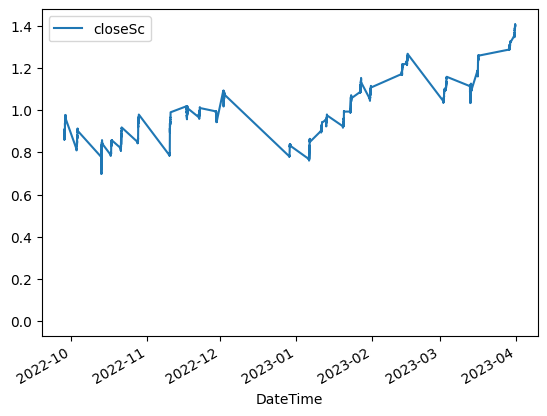

In [69]:
nq_Up.plot( y='closeSc')
plt.axhline(y= 0, color='r', linestyle='none')
plt.show()

In [73]:
# nqUp1 = nqUp.drop('day', axis=1)
# esUp1 = esUp.drop('day', axis=1)  # drop categorical column

# scaler = StandardScaler()
# nq_Up_scaled = scaler.fit_transform(nqUp1)
# es_Up_scaled = scaler.fit_transform(esUp1)

# nq_Up_scaled_df = pd.DataFrame(nq_Up_scaled, columns= nqUp1.columns)

type(nq_Up_scaled_df)  #pandas.core.frame.DataFrame
nq_Up_scaled_df.head()
nq_Up_scaled_df = nq_Up_scaled_df.reset_index().set_index(nqUp.index)
# nq_Up_scaled_df.index.name = 'DateTime'
nq_Up_scaled_df.head()
# nq_Up_scaled_df = pd.DataFrame(nq_Up_scaled, columns= esUp1.columns)
# scaled_df = scaled_df.set_index(final_df['dateTime'])

,DateTime,Vol,BidAsk,open,high,low,close,type
DateTime,,,,,,,,
2022-12-29 04:20:00,2022-12-29 04:20:00,-0.764732,-0.067936,-1.465047,-1.470322,-1.454660,-1.464674,0.0
2022-12-29 04:22:00,2022-12-29 04:22:00,-0.787545,0.136791,-1.463428,-1.466269,-1.452638,-1.457792,0.0
2022-12-29 04:24:00,2022-12-29 04:24:00,-0.750108,-0.017799,-1.456547,-1.464648,-1.448190,-1.456172,0.0
2022-12-29 04:26:00,2022-12-29 04:26:00,-0.775261,-0.293554,-1.454118,-1.465053,-1.454660,-1.465484,0.0
2022-12-29 04:28:00,2022-12-29 04:28:00,-0.809188,-0.297732,-1.465452,-1.475996,-1.458703,-1.469128,0.0


In [31]:
# del nq_Up_scaled_df['type']
# nq_Up_scaled_df.head()
# nq_Up_scaled_df.shape   # (9882, 6)
# nq_Up_scaled_df['day'] = 'Up'
# nq_Up_scaled_df['vDay'] = 5

# nq_Up_scaled_df.shape   # (9882, 8)
nq_Up_scaled_df.head()



,Vol,BidAsk,open,high,low,close,day,vDay
0,-0.764732,-0.067936,-1.465047,-1.470322,-1.454660,-1.464674,Up,5
1,-0.787545,0.136791,-1.463428,-1.466269,-1.452638,-1.457792,Up,5
2,-0.750108,-0.017799,-1.456547,-1.464648,-1.448190,-1.456172,Up,5
3,-0.775261,-0.293554,-1.454118,-1.465053,-1.454660,-1.465484,Up,5
4,-0.809188,-0.297732,-1.465452,-1.475996,-1.458703,-1.469128,Up,5


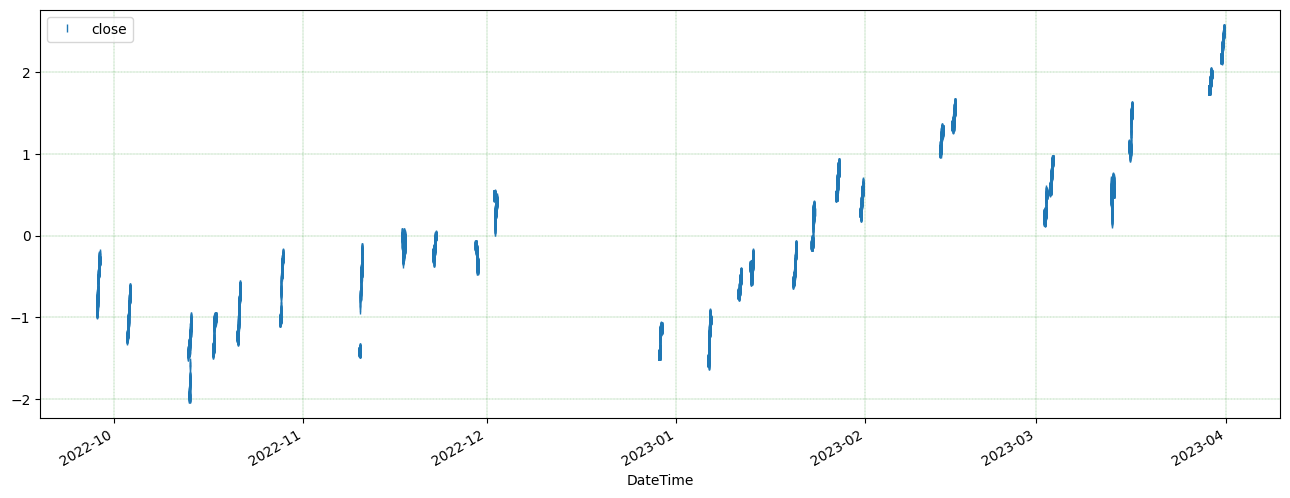

In [54]:
nq_Up_scaled_df.plot( y='close' , figsize=(16,6), marker='|', linestyle='none', linewidth= 0.3)   
plt.grid(color = 'green', linestyle = '--', linewidth = 0.2) 

In [156]:
nq_Up.head()
# type(nq_Up.index)

,Vol,BidAsk,open,high,low,close,day,type,closeSc
DateTime,,,,,,,,,
2022-12-29 04:20:00,287.0,-9.0,10837.25,10841.50,10837.00,10838.25,Up,5,0.781880
2022-12-29 04:22:00,248.0,40.0,10838.25,10844.00,10838.25,10842.50,Up,5,0.782958
2022-12-29 04:24:00,312.0,3.0,10842.50,10845.00,10841.00,10843.50,Up,5,0.783211
2022-12-29 04:26:00,269.0,-63.0,10844.00,10844.75,10837.00,10837.75,Up,5,0.781754
2022-12-29 04:28:00,211.0,-64.0,10837.00,10838.00,10834.50,10835.50,Up,5,0.781183


In [ ]:
nq_UpDay['boo'] = nq_Up.groupby(nq_Up.index.to_period('D'))['close'].transform(min_max_scale)
# nq_UpDay = pd.DataFrame(nq_UpDay)
type(nq_UpDay.index) #range.RangeIndex
# nq_UpDay.index = pd.to_datetime(daily_min.index)
# del nq_UpDay[0]
nq_UpDay.tail()
# nq_UpDay['2022-10-17':'2022-10-18'].describe()

In [182]:
close_series.shape  # (9882, 9)
close_series.columns   # ['Vol', 'BidAsk', 'open', 'high', 'low', 'close', 'day', 'type', 'closeSc']
cols = ['Date','Vol', 'BidAsk', 'open', 'high', 'low', 'close', 'day', 'type', 'closeSc']
close_series.head()

,Vol,BidAsk,open,high,low,close,day,type,closeSc
DateTime,,,,,,,,,
2022-12-29 04:20:00,287.0,-9.0,10837.25,10841.50,10837.00,10838.25,Up,5,0.781880
2022-12-29 04:22:00,248.0,40.0,10838.25,10844.00,10838.25,10842.50,Up,5,0.782958
2022-12-29 04:24:00,312.0,3.0,10842.50,10845.00,10841.00,10843.50,Up,5,0.783211
2022-12-29 04:26:00,269.0,-63.0,10844.00,10844.75,10837.00,10837.75,Up,5,0.781754
2022-12-29 04:28:00,211.0,-64.0,10837.00,10838.00,10834.50,10835.50,Up,5,0.781183


In [ ]:
# nqZscore['Zscored'] = stats.zscore(nq_Up['2022-12-29 04:20:00':'2022-12-29 16:30:00']['close'])

In [217]:
close_series.sort_index().head()

,Vol,BidAsk,open,high,low,close,day,type,closeSc
DateTime,,,,,,,,,
2022-09-28 04:20:00,1451.0,191.0,11204.00,11225.00,11203.75,11223.25,Up,5,0.879489
2022-09-28 04:22:00,783.0,-81.0,11223.00,11227.00,11214.50,11217.25,Up,5,0.877968
2022-09-28 04:24:00,599.0,59.0,11218.25,11231.25,11217.25,11228.25,Up,5,0.880757
2022-09-28 04:26:00,767.0,-146.0,11228.25,11229.50,11202.75,11205.00,Up,5,0.874862
2022-09-28 04:28:00,876.0,-100.0,11206.25,11207.50,11193.75,11199.00,Up,5,0.873341


In [ ]:



# Make sure the index is a datetime object
# close_series.index = pd.to_datetime(close_series.index)

# Group by day and find min and max close values
# daily_min = close_series.groupby(close_series.index.date).min()
# daily_max = close_series.groupby(close_series.index.date).max()

# # Convert the indices of daily_min and daily_max to datetime.date objects
# daily_min.index = pd.to_datetime(daily_min.index).date
# daily_max.index = pd.to_datetime(daily_max.index).date

# # Define the min-max scaling function
# def min_max_scale(value, min_value, max_value):
    # return (value - min_value) / (max_value - min_value)

# # Create a DataFrame with the original 'Close' values and their corresponding date
df = pd.DataFrame(close_series).reset_index()
df.columns = ['Date', 'close']

# # Apply the min-max scaling function to each 'Close' value
# scaled_close_series = df.apply(
#     lambda row: min_max_scale(row['Close'], daily_min[row['Date'].date()], daily_max[row['Date'].date()]), axis=1)

# # Set the index of the scaled Series to be the same as the original Series
# scaled_close_series.index = close_series.index

# # Display the resulting scaled Series
# print(scaled_close_series)


In [ ]:

# Assuming your Series is named 'close_series'
# Make sure the index is a datetime object
# close_series.index = pd.to_datetime(close_series.index)

# Group by day
daily_group = close_series.groupby(close_series.index.date)

# Define the min-max scaling function
def min_max_scale(group):
    min_value = group.min()
    max_value = group.max()
    return ((group - min_value) / (max_value - min_value)) - 0.5

# Apply the min-max scaling function to each day's 'Close' values
scaled_close_series = daily_group.transform(min_max_scale)

# Display the resulting scaled Series
print(scaled_close_series.sort_index())

scaled_close_series.plot(y='close')


In [ ]:
print(scaled_close_series.sort_index())

<AxesSubplot:xlabel='DateTime'>

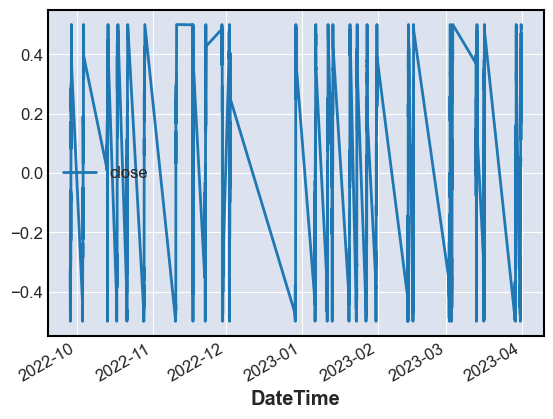

In [408]:
scaled_close_series.plot(y='close')